In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = pd.DataFrame(data=wine.data,columns=wine.feature_names)
y = wine.target

print(y)
print(X.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76    

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=wine.feature_names)

In [9]:
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

eps_values = [i/10 for i in range(1, 43, 1)]
min_samples_values = [i for i in range(3, 21, 1)]
metric_values = ['euclidean']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
p_values = [i for i in range(2,6,1)]
split_values = [i/100 for i in range(10,55,5)]

best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

for eps,min_samples,metric,algorithm,p,split in product(eps_values,min_samples_values,metric_values,algorithm_values,p_values,split_values):

    train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=None,test_size=split)
    model = DBSCAN(eps=eps,min_samples=min_samples,metric=metric,algorithm=algorithm,p=p)
    model.fit(train_X,train_y)
    pred_y = model.fit_predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = split
        best_model = model
        best_param_list = [eps,min_samples,metric,algorithm,p,split]
        best_pred_y = pred_y
        best_test_y = test_y



In [10]:
print(best_score)
print(best_param_list)
print(best_train_test_ratio)
print(best_model.components_)

1.0
[3.2, 3, 'euclidean', 'brute', 2, 0.1]
0.1
[[ 1.48155459 -0.51736664  0.30515936 -1.28970717  0.86070511  1.56209322
   1.36612798 -0.17609475  0.66421706  0.73186953  0.40605066  0.33660575
   2.23903902]
 [ 0.69098501 -0.54429654  0.34171277  0.30180329  1.14155847  1.06537044
   0.75370828 -1.3041876   1.50521744  0.51558454  0.09893695  0.59084546
   1.18815608]
 [ 1.0862698  -0.40067043  0.81690709 -1.34976417  0.08835836  1.53004659
   1.53680232 -1.54592178  0.19115435  0.16087715 -0.33979692  1.33944015
   1.10854374]
 [-1.23602833  0.98173081 -1.33974405 -0.1486242  -0.89462841 -0.47286784
  -0.39081379  0.06563943  0.48900865 -1.63428828 -0.12042998  0.61909432
  -0.58242244]
 [ 0.71569031  0.21871714  1.18244118  1.50294326  0.36921172 -1.19391704
  -1.19398717  0.22679555 -0.08917911  1.5580782  -0.95402434 -1.1464592
   0.0098934 ]
 [-0.23546371 -0.02365191  0.12239231  1.35280076 -0.12228166 -1.83484966
  -0.94299548 -0.74014117 -1.33315885  0.27767105 -1.30501144 -1.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix: 

[[7 0 0]
 [0 6 0]
 [0 0 5]]




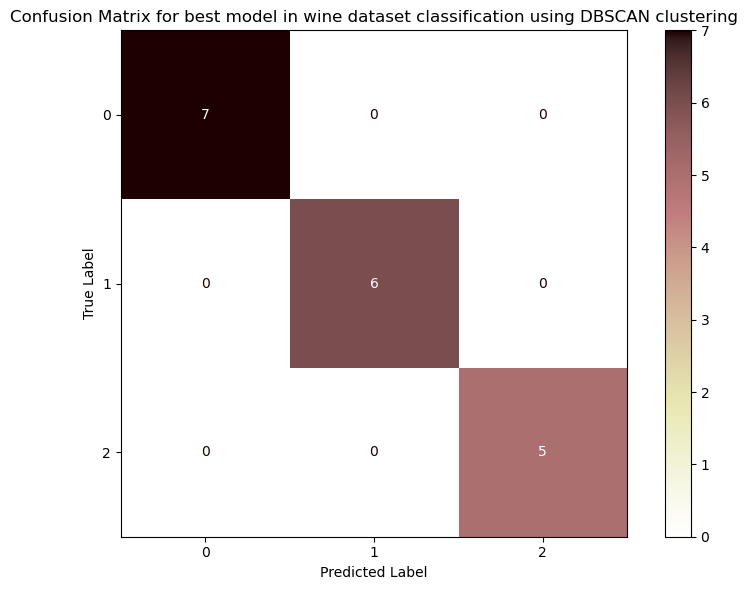

In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(best_test_y, best_pred_y)
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in wine dataset classification using DBSCAN clustering')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

In [12]:
from sklearn import metrics

rand_index = metrics.rand_score(best_test_y, best_pred_y)
adjusted_rand_index = metrics.adjusted_rand_score(best_test_y, best_pred_y)

# Mutual Information and Adjusted Mutual Information
mutual_info = metrics.mutual_info_score(best_test_y, best_pred_y)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(best_test_y, best_pred_y)
normalized_mutual_info = metrics.normalized_mutual_info_score(best_test_y, best_pred_y)

# Silhouette Coefficient, Calinski-Harabasz Index, and Davies-Bouldin Index
silhouette_coefficient = metrics.silhouette_score(X, y)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, y)
davies_bouldin_index = metrics.davies_bouldin_score(X, y)

print("Rand Index:", rand_index)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Mutual Information:", mutual_info)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Normalized Mutual Information:", normalized_mutual_info)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

Rand Index: 1.0
Adjusted Rand Index: 1.0
Mutual Information: 1.0893096789558299
Adjusted Mutual Information: 1.0
Normalized Mutual Information: 1.0
Silhouette Coefficient: 0.2797798205630649
Calinski-Harabasz Index: 68.25192687077893
Davies-Bouldin Index: 1.406587076416
